<a class="anchor" id="0"></a>
<h1 align="center"><b>State of Data Brazil 2021 - Análise de Dados</b></h1>

<img src="https://storage.googleapis.com/kaggle-datasets-images/2043193/3389022/2c02116d8958b741983db25871c8d92a/dataset-cover.png?t=2022-03-31-23-12-06" width="50%" />

Criado em: 19/05/2022

Última Atualização: 26/05/2022

Análise feita por 🚀 <a href="https://www.kaggle.com/rafanthx13"> Rafael Morais de Assis</a>

<!--


TODO GREAT TASK
+ Mini Dash na parte de cruzamento
+ Analise pradronizada de Numeral feature

TODO QUICK TASK LIST
+ Fazer Parte 5, 
+ Por tamanho da empresa em barra ordenada; 
+ por <br> empieplot de modelo (ou repalce)
+ centralizar def d p8,p7,p6

DID LIST
+ Limpar listagem de colunas
+ Limpar defs

TODO NO FINAL
+ Corrigir Ortografia

-->


<a class="anchor" id="top"></a>
## **Índice**

+ 1. [Importar Dataset e Libs](#1)
+ 2. [Snippets](#2)
+ 3. [Análise Geral sobre os dados](#3)
+ 4. [Análise Exploratória das Perguntas](#4)
  - 4.1 [Parte 1 - Dados demográficos](#5)
  - 4.2 [Parte 2 - Dados sobre carreira](#6)
  - 4.3 [Parte 3 - Desafios dos gestores de times de dados](#7)
  - 4.4 [Parte 4 - Conhecimentos na área de dados](#8)
  - 4.5 [Parte 5 - Objetivos na área de dados](#9)
  - 4.6 [Parte 6 - Conhecimentos em Engenharia de Dados/DE](#10)
  - 4.7 [Parte 7 - Conhecimentos em Análise de Dados/DA](#11)
  - 4.8 [Parte 8 - Conhecimentos em Ciências de Dados/DS](#12)
  - 4.9 [Parte 9 - Sobre a comunidade Data Hackers](#13)
+ 5. [Cruzamento de Salário com outras *features*](#14)
+ 6. [Dash de salário com outras *features*](#15)
+ 7. [Análise de dados sobre trabalhadores de dados **Júnior**](#16)
  - 7.1 [Perfil de um Cientista de Dados Júnior](#17) 
  - 7.2 [Perfil de um Engenheiro de Dados Júnior](#18) 
  - 7.3 [Perfil de um Analistade Dados Júnior](#19) 



<a class="anchor" id="1"></a>
## Importar DataSet e Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Configs
pd.options.display.float_format = '{:,.4f}'.format
sns.set(style="whitegrid")
sns.set_palette("Set3") 
plt.style.use('seaborn')
seed = 42
np.random.seed(seed)
random.seed(seed)


/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv


In [2]:
df = pd.read_csv('/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv', low_memory=False)

<a class="anchor" id="2"></a>
## Snippets e Plots

In [3]:
def get_prefix_cols(prefix="('P9"):
    """
    Retorna aas colunas do DataFrame que começam com um prefixo
    """
    return [x for x in df.columns.tolist() if x.startswith(prefix)]

In [4]:
def df_rating_missing_data(my_df):
    """Create DataFrame with Missing Rate
    """
    # get sum missing rows and filter has mising values
    ms_sum = my_df.isnull().sum()
    ms_sum = ms_sum.drop( ms_sum[ms_sum == 0].index )
    # get percentage missing ratio and filter has mising values
    ms_per = (my_df.isnull().sum() / len(my_df))
    ms_per = ms_per.drop( ms_per[ms_per == 0].index)
    # order by
    ms_per = ms_per.sort_values(ascending=False)
    ms_sum = ms_sum.sort_values(ascending=False)
    # format percentage
    ms_per = ms_per.apply(lambda x: '{:.3%}'.format(x))
    return pd.DataFrame({'Missing Rate' : ms_per, 'Count Missing': ms_sum})  

In [5]:
from math import floor

def insert_break_line(astring, index_point=5):
    """
    Usada para por <br> em textos muitos longos, que acaba atrapalhando na visualização
    """
    splited = astring.split(' ')
    for i in range(floor(len(splited)/index_point)):
        splited.insert(index_point * (i+1), '<br>')
    return " ".join(splited).replace(' <br> ','<br>')

In [6]:
def pie_plot_one_feat(col, title, replaces={}, break_line=False, break_point=10):
    df_col = df[col]
    df_col = df_col.replace(replaces)
    df_aux = df_col.value_counts().reset_index().rename(
        columns={'index': 'Valor', col: 'Quantidade'})
    
    if(break_line):
        df_aux['Valor'] = df_aux['Valor'].apply(
            lambda x:  x if len(x.split(' ')) < break_point else insert_break_line(x) )
        
    fig = px.pie(df_aux, values='Quantidade', names='Valor', title=title,
                     color_discrete_sequence=px.colors.sequential.Rainbow 
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()   

In [7]:
def count_valid_values(aseries, show=False):
    """
    Tem a opção de mostrar os dados caso quiser velos em print
    """
    if(show):
        print('unique_values =', len(aseries.unique()), end='')
        print(' | count_not_nan = ', aseries.count() )
    return aseries.count()

In [8]:
def bar_plot_many_options(adf,prefix, temp_name_col, title, true_count, replaces={}, break_line=False ):
    """
    Serve somente para este notebook. Apartir da pergunta base, busca as outras colunas das respostas.
    @break line: caso tiver nomes muito grandes, insere <br>
    """
    df_temp = adf[get_prefix_cols(prefix=prefix)]
    df_temp = df_temp.sum().reset_index()
    df_temp['index'] = df_temp['index'].apply(lambda x: x.split("', '")[1].strip().replace("'",'').replace(')','',1))
    df_temp = df_temp.rename(columns={'index': temp_name_col, 0: 'Quantidade'})
    df_temp['Quantidade'] = df_temp['Quantidade'].apply(lambda x: int(x))
    # Alter x-axis (cat-feat value)
    df_temp = df_temp.replace(replaces).sort_values('Quantidade', ascending=True)
    if(break_line):
        df_temp[temp_name_col] = df_temp[temp_name_col].apply(
            lambda x: x if len(x.split(' ')) < 10 else insert_break_line(x) )
    # Porcentagem
    df_temp['Porcentagem'] = round( (df_temp['Quantidade'] / true_count) * 100.0, 2)
    df_temp['PorcentagemStr'] = df_temp['Porcentagem'].apply(lambda x: str(format(x, '.2f')) + '%'  )

    fig = px.bar(df_temp, y=temp_name_col, x='Quantidade',
                 color='Quantidade', hover_data=['Porcentagem'],
                 text="PorcentagemStr", orientation='h',
                 title=title, color_continuous_scale='dense'
    )
    if(break_line):
        fig.update_layout(height=1000)
    fig.show()


In [9]:
def pie_plot_one_option(prefix, temp_name_col, title, replaces={}):
    df_temp = df[get_prefix_cols(prefix=prefix)]
    df_temp = df_temp.sum().reset_index()
    df_temp['index'] = df_temp['index'].apply(lambda x: x.split(',')[1].strip().replace("'",'')[:-1])
    df_temp = df_temp.rename(columns={'index': temp_name_col, 0: 'Quantidade'})
    df_temp['Quantidade'] = df_temp['Quantidade'].apply(lambda x: int(x))
    df_temp = df_temp.replace(replaces).sort_values('Quantidade', ascending=True)

    fig = px.pie(df_temp, values='Quantidade', names=temp_name_col, title=title,
                 color_discrete_sequence=px.colors.sequential.Jet 
                 #dense[::-1]; Rainbow # full list: 
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()   

<a class="anchor" id="3"></a>
## Análise Geral

2644 registros. Nem tudo está Respondido

In [10]:
print( df.shape[0], 'linhas |', df.shape[1], 'colunas')
df[ df.columns.tolist()[:4] ].head()

2645 linhas | 356 colunas


,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0000,35-39,Masculino
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0000,35-39,Masculino
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0000,30-34,Masculino
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0000,35-39,Feminino
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0000,35-39,Masculino


In [11]:
# Listar todas as colunas com alguns valores

# list_cols = df.columns.tolist()
# for el in list_cols:
#     print(el)
#     print(df[el].unique().tolist()[:3])
#     print()

<a class="anchor" id="3.1"></a>
## Valores Nulos

+ Grande parte das colunas tem algum valor nulo. Isso deverá ser considerado nas análises.

In [12]:
df_rating_missing_data(df)

,Missing Rate,Count Missing
"('P5_b ', 'Qual oportunidade você está buscando?')",94.064%,2488
"('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')",93.989%,2486
"('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')",93.913%,2484
"('P6_g_c ', 'AWS Deequ')",92.136%,2437
"('P6_g_k ', 'Anomalo')",92.136%,2437
...,...,...
"('P2_q ', 'Atualmente qual a sua forma de trabalho?')",10.586%,280
"('P1_i ', 'Área de Formação')",2.420%,64
"('P1_e ', 'Estado onde mora')",1.361%,36
"('P1_e_a ', 'uf onde mora')",1.361%,36


<AxesSubplot:>

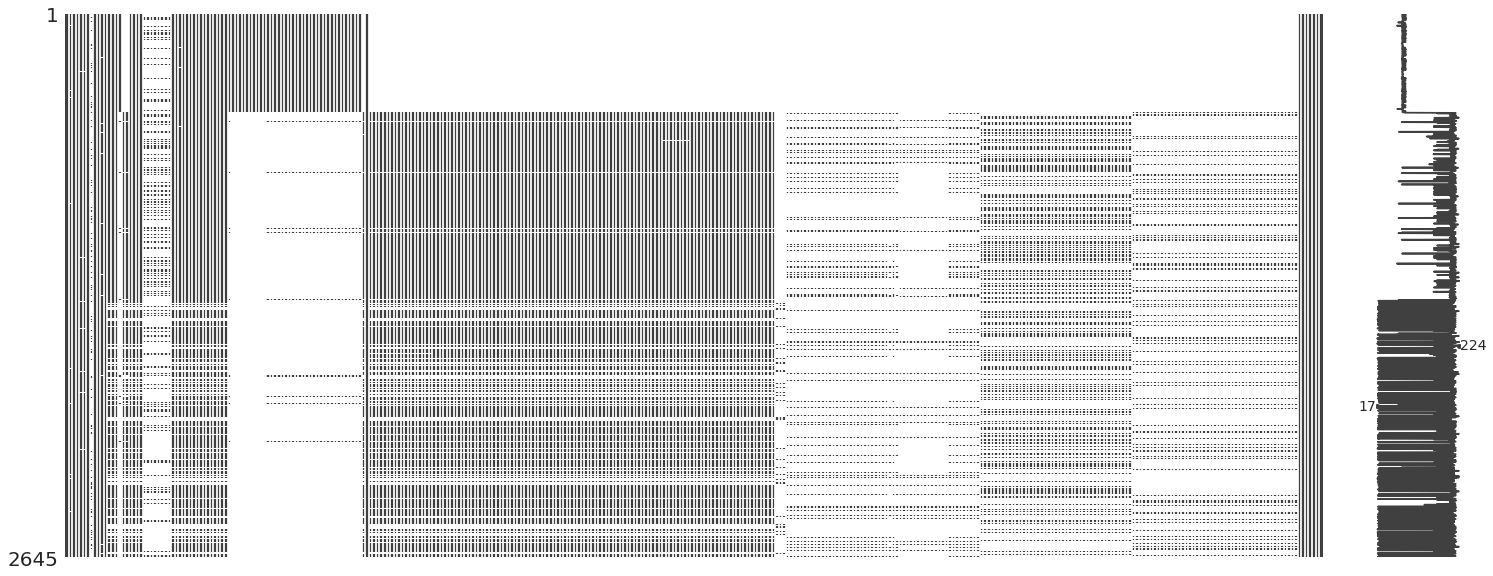

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

<a class="anchor" id="4"></a>
## Análise Exploratória das Perguntas

# Parte 1 - Dados demográficos <a class="anchor" id="5"></a> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Voltar ao Índice</a>

<!--
"('P1_a ', 'Idade')",
    "('P1_a_a ', 'Faixa idade')",

"('P1_b ', 'Genero')",

"('P1_e ', 'Estado onde mora')",
"('P1_e_a ', 'uf onde mora')",
"('P1_e_b ', 'Regiao onde mora')",
"('P1_g_b ', 'Regiao de origem')",
"('P1_g_c ', 'Mudou de Estado?')",

"('P1_h ', 'Nivel de Ensino')",

"('P1_i ', 'Área de Formação')",
-->

In [14]:
df_section = df[get_prefix_cols(prefix="('P1")]
display(df_rating_missing_data(df_section))
# # todas as colunas estão cehias, por isso nao aparece 0%
# msno.matrix(df_section);

,Missing Rate,Count Missing
"('P1_g_b ', 'Regiao de origem')",81.701%,2161
"('P1_i ', 'Área de Formação')",2.420%,64
"('P1_e ', 'Estado onde mora')",1.361%,36
"('P1_e_a ', 'uf onde mora')",1.361%,36
"('P1_a ', 'Idade')",1.059%,28


### Idade

Grandes parte da idades de quem respondeu é entre 25 á 35 anos. Mínimo de 18 e Máximo de 54


In [15]:
df[ ["('P1_a_a ', 'Faixa idade')", "('P1_a ', 'Idade')"] ].describe().T

,count,mean,std,min,25%,50%,75%,max
"('P1_a ', 'Idade')","2,617.0000",31.1571,7.1306,18.0000,26.0000,30.0000,35.0000,54.0000


In [16]:
# eda_numerical_feat(df["('P1_a ', 'Idade')"],
#                    title="Distribuição da Idade")

### Sexo

In [17]:
pie_plot_one_feat(
    col="('P1_b ', 'Genero')",
    title='Gênero',
)

### P1 - E - Estado onde mora

````
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
````

In [18]:
pie_plot_one_feat(
    col="('P1_e ', 'Estado onde mora')",
    title='Estado onde mora',
)

In [19]:
pie_plot_one_feat(
    col="('P1_g_b ', 'Regiao de origem')",
    title='Mudou de Estado',
)

In [20]:
pie_plot_one_feat(
    col="('P1_g_c ', 'Mudou de Estado?')",
    title='Mudou de Estado',
    replaces={0: 'Não', 1: 'Sim'},
)

In [21]:
pie_plot_one_feat(
    col="('P1_h ', 'Nivel de Ensino')",
    title='Nível de Ensino',
)

In [22]:
pie_plot_one_feat(
    col="('P1_i ', 'Área de Formação')",
    title='Área de Formação',
)

# Parte 2 - Dados sobre carreira
<!--
"('P2_a ', 'Qual sua situação atual de trabalho?')",

"('P2_b ', 'Setor')",

"('P2_c ', 'Numero de Funcionarios')",

"('P2_d ', 'Gestor?')",

"('P2_e ', 'Cargo como Gestor')",

"('P2_f ', 'Cargo Atual')",

"('P2_g ', 'Nivel')",

"('P2_h ', 'Faixa salarial')",

"('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",

"('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",

"('P2_k ', 'Você está satisfeito na sua empresa atual?')",

"('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
    "('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')",
    "('P2_l_b ', 'Salário atual não corresponde ao mercado')",
    "('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')",
    "('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')",
    "('P2_l_e ', 'Gostaria de receber mais benefícios')",
    "('P2_l_f ', 'O clima de trabalho/ambiente não é bom')",
    "('P2_l_g ', 'Falta de maturidade analítica na empresa')",
    
"('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')",

"('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')",

"('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')",
    "('P2_o_a ', 'Remuneração/Salário')",
    "('P2_o_b ', 'Benefícios')",
    "('P2_o_c ', 'Propósito do trabalho e da empresa')",
    "('P2_o_d ', 'Flexibilidade de trabalho remoto')",
    "('P2_o_e ', 'Ambiente e clima de trabalho')",
    "('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')",
    "('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')",
    "('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')",
    "('P2_o_i ', 'Qualidade dos gestores e líderes')",
    "('P2_o_j ', 'Reputação que a empresa tem no mercado')",
    
"('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
-->

### P2 - A - Qual a situação de trabalho

In [23]:
pie_plot_one_feat(
    col="('P2_a ', 'Qual sua situação atual de trabalho?')",
    title='Situação de Trabalho',
    break_line=True,
)

In [24]:
pie_plot_one_feat(
    col="('P2_b ', 'Setor')",
    title='Setor',
)

### P2 - C - Numero de Funcionarios

Melhorar: Por em barras e Ordenado

In [25]:
pie_plot_one_feat(
    col="('P2_c ', 'Numero de Funcionarios')",
    title='Numero de Funcionarios',
)

### P2 - D - Gestor

In [26]:
pie_plot_one_feat(
    col="('P2_d ', 'Gestor?')",
    title='Gestor',
    replaces={1:'Sim',0:'Não'}
)

### P2 - E - Cargo como Gestor

In [27]:
pie_plot_one_feat(
    col="('P2_e ', 'Cargo como Gestor')",
    title='Cargo como Gestor',
)

### P2 - F - Cargo Atual

In [28]:
pie_plot_one_feat(
    col="('P2_f ', 'Cargo Atual')",
    title='Cargo Atual'
)

### P2 - G - Nível

In [29]:
pie_plot_one_feat(
    col="('P2_g ', 'Nivel')",
    title='Nível',
)

### P2 - H - Faixa salarial

In [30]:
df_temp = df["('P2_h ', 'Faixa salarial')"].value_counts().reset_index()
df_temp = df_temp.rename(columns={'index': 'Faixa salarial', "('P2_h ', 'Faixa salarial')": "Quantidade"})
df_temp['Faixa salarial'] = df_temp['Faixa salarial'].apply(lambda x: x.replace('R$', 'RS'))
df_temp['Ordem'] = [7, 5, 6, 8, 4, 3, 9, 2, 10, 11, 12, 13, 1]
df_temp['Porcentagem'] = round( (df_temp['Quantidade'] / df_temp['Quantidade'].sum()) * 100.0, 2)
df_temp['PorcentagemStr'] = df_temp['Porcentagem'].apply(lambda x: str(format(x, '.2f')) + '%'  )
df_temp = df_temp.sort_values('Ordem')
df_temp

,Faixa salarial,Quantidade,Ordem,Porcentagem,PorcentagemStr
12,Menos de RS 1.000/mês,32,1,1.3500,1.35%
7,de RS 1.001/mês a RS 2.000/mês,126,2,5.3300,5.33%
5,de RS 2.001/mês a RS 3000/mês,180,3,7.6100,7.61%
4,de RS 3.001/mês a RS 4.000/mês,183,4,7.7400,7.74%
1,de RS 4.001/mês a RS 6.000/mês,403,5,17.0400,17.04%
2,de RS 6.001/mês a RS 8.000/mês,393,6,16.6200,16.62%
0,de RS 8.001/mês a RS 12.000/mês,479,7,20.2500,20.25%
3,de RS 12.001/mês a RS 16.000/mês,263,8,11.1200,11.12%
6,de RS 16.001/mês a RS 20.000/mês,129,9,5.4500,5.45%
8,de RS 20.001/mês a RS 25.000/mês,62,10,2.6200,2.62%


In [31]:
fig = px.bar(
    df_temp, y='Quantidade', x='Faixa salarial',
    color='Quantidade', hover_data=['PorcentagemStr'],
    text="PorcentagemStr", title='Faixa Salarial',
    color_continuous_scale='dense'
)
fig.show()

### P2 - I - Quanto tempo de experiência na área de dados você tem?

In [32]:
pie_plot_one_feat(
    col="('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
    title='EXP na área de dados',
)

### P2 - J - Exp em TI antes de entrar na área de dados

In [33]:
pie_plot_one_feat(
    col="('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
    title='Exp em TI antes de entrar na área de dados',
    replaces={
        'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados':
        'Não tive experiência<br>na área de TI/Engenharia de Software<br>antes de começar a trabalhar <br>na área de dados',
    }
)

### P2 - K - Está satisfeito na sua empresa atual

In [34]:
pie_plot_one_feat(
    col="('P2_k ', 'Você está satisfeito na sua empresa atual?')",
    title='Está satisfeito na sua empresa atual',
    replaces={1:'Sim',0:'Não'}
)

### P2 - M - Você participou de entrevistas de emprego nos últimos 6 meses?

In [35]:
pie_plot_one_feat(
    col="('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')",
    title='Você participou de entrevistas de emprego nos últimos 6 meses?',
    break_line=True,
    break_point=5,
)

### P2 - N - pretende mudar de emprego nos próximos 6 meses

In [36]:
pie_plot_one_feat(
    col="('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')",
    title='Você participou de entrevistas de emprego nos últimos 6 meses?',
    break_line=True,
)

### P2 - Q - Atualmente qual a sua forma de trabalho?

In [37]:
pie_plot_one_feat(
    col="('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
    title='Forma de Trabalho',
    replaces={
        'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': 'Modelo hibrido flexivel',
        'Modelo híbrido com dias fixos de trabalho presencial': 'Modelo hibrido com <br> dias fixo presencial'
    }
)

In [38]:
pie_plot_one_feat(
    col="('P2_r ', 'Qual a forma de trabalho ideal para você?')",
    title='Qual a forma de Trabalho Ideal',
)

In [39]:
pie_plot_one_feat(
    col="('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')",
    title='O que fara caso a empresa adotar 100% remoto',
)

In [40]:
multiple_answer_col = "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')"

bar_plot_many_options(
    df,
    prefix="('P2_l_",
    temp_name_col='Motivo de instisfacao',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Principal motivo de instisfação no trabalho',    
)

In [41]:
multiple_answer_col = "('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')"

bar_plot_many_options(
    df,
    prefix="('P2_o_",
    temp_name_col='Criterios para decidir trabalhar',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Principais critérios na hora de decidir onde trabalhar',    
)

# Parte 3 - Desafios dos gestores de times de dados

<!--
"('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')",

"('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')",
"('P3_b_a ', 'Analytics Engineer')",
"('P3_b_b ', 'Engenharia de Dados/Data Engineer')",
"('P3_b_c ', 'Analista de Dados/Data Analyst')",
"('P3_b_d ', 'Cientista de Dados/Data Scientist')",
"('P3_b_e ', 'Database Administrator/DBA')",
"('P3_b_f ', 'Analista de Business Intelligence/BI')",
"('P3_b_g ', 'Arquiteto de Dados/Data Architect')",
"('P3_b_h ', 'Data Product Manager/DPM')",
"('P3_b_i ', 'Business Analyst')",
 
 "('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')",
     "('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')",
     "('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')",
     "('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')",
     "('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')",
     "('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')",
     "('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')",
     "('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')",
     "('P3_c_h ', 'Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.')",
     "('P3_c_i ', 'Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.')",
     "('P3_c_j ', 'Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.')",
     "('P3_c_k ', 'Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira')",
     
 "('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')",
     "('P3_d_ ', 'a Contratar novos talentos.')",
     "('P3_d_ ', 'b Reter talentos.')",
     "('P3_d_ ', 'c Convencer a empresa a aumentar os investimentos na área de dados.')",
     "('P3_d_ ', 'd Gestão de equipes no ambiente remoto.')",
     "('P3_d_ ', 'e Gestão de projetos envolvendo áreas multidisciplinares da empresa.')",
     "('P3_d_ ', 'f Organizar as informações e garantir a qualidade e confiabilidade.')",
     "('P3_d_ ', 'g Conseguir processar e armazenar um alto volume de dados.')",
     "('P3_d_ ', 'h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.')",
     "('P3_d_ ', 'i Desenvolver e manter modelos Machine Learning em produção.')",
     "('P3_d_ ', 'j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados.')",
     "('P3_d_ ', 'k Garantir a manutenção dos projetos e modelos em produção, em meio ao crescimento da empresa.')",
     "('P3_d_l ', 'Conseguir levar inovação para a empresa através dos dados.')",
     "('P3_d_m ', 'Garantir retorno do investimento (ROI) em projetos de dados.')",
     "('P3_d_n ', 'Dividir o tempo entre entregas técnicas e gestão.')",
-->

### P3 - B - Papeis presentes na equipe de dados

In [42]:
multiple_answer_col = "('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')"

bar_plot_many_options(
    df,
    prefix="('P3_b_",
    temp_name_col='Papeis na Equpe',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Papeis mais presentes na equipe de dados',    
)

### P3 - C - Quais as responsabilidades dos gestores

In [43]:
multiple_answer_col = "('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')"

bar_plot_many_options(
    df,
    prefix="('P3_c_",
    temp_name_col='Papeis do Gestor',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Papeis mais cumpridos pelos gestores',    
    break_line=True,
)

### P3 - Maiores desafios como gestor

In [44]:
multiple_answer_col = "('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')"

bar_plot_many_options(
    df,
    prefix="('P3_d_",
    temp_name_col='Maiores Desafios',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Maiores Desafios como gestor',    
    break_line=True,
)

# Parte 4 - Conhecimentos na área de dados

Falta "('P4_a ', 'Atuacao')",

<!-- 
 "('P4_a ', 'Atuacao')",
 
 "('P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?')",
     "('P4_b_a ', 'Dados relacionais (estruturados em bancos SQL)')",
     "('P4_b_b ', 'Dados armazenados em bancos NoSQL')",
     "('P4_b_c ', 'Imagens')", "('P4_b_d ', 'Textos/Documentos')",
     "('P4_b_e ', 'Vídeos')", "('P4_b_f ', 'Áudios')", "('P4_b_g ', 'Planilhas')",
     "('P4_b_h ', 'Dados georeferenciados')",
     
 "('P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?')",
     "('P4_c_a ', 'Dados relacionais (estruturados em bancos SQL)')",
     "('P4_c_b ', 'Dados armazenados em bancos NoSQL')",
     "('P4_c_c ', 'Imagens')", "('P4_c_d ', 'Textos/Documentos')", "('P4_c_e ', 'Vídeos')",
     "('P4_c_f ', 'Áudios')", "('P4_c_g ', 'Planilhas')","('P4_c_h ', 'Dados georeferenciados')",
     
 "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')",
     "('P4_d_a ', 'SQL')", "('P4_d_b ', 'R ')", "('P4_d_c ', 'Python')",
     "('P4_d_d ', 'C/C++/C#')", "('P4_d_e ', '.NET')", "('P4_d_f ', 'Java')",
     "('P4_d_g ', 'Julia')", "('P4_d_h ', 'SAS/Stata')", "('P4_d_i ', 'Visual Basic/VBA')",
     "('P4_d_j ', 'Scala')", "('P4_d_k ', 'Matlab')", "('P4_d_l ', 'PHP')",
     "('P4_d_m ', 'Javascript')", "('P4_d_n ', 'Não utilizo nenhuma linguagem')",
     
 "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')",
     "('P4_e_a ', 'SQL')", "('P4_e_b ', 'R ')", "('P4_e_c ', 'Python')",
     "('P4_e_d ', 'C/C++/C#')", "('P4_e_e ', '.NET')","('P4_e_f ', 'Java')",
     "('P4_e_g ', 'Julia')", "('P4_e_h ', 'SAS/Stata')", "('P4_e_i ', 'Visual Basic/VBA')",
     "('P4_e_j ', 'Scala')", "('P4_e_k ', 'Matlab')", "('P4_e_l ', 'PHP')", "('P4_e_m ', 'Javascript')",
     "('P4_e_n ', 'Não utilizo nenhuma linguagem')",
     
 "('P4_f ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')",
     "('P4_f_a ', 'MySQL')", "('P4_f_b ', 'Oracle')", "('P4_f_c ', 'SQL SERVER')",
     "('P4_f_d ', 'SAP')", "('P4_f_e ', 'Amazon Aurora ou RDS')",
     "('P4_f_f ', 'Amazon DynamoDB')", "('P4_f_g ', 'CoachDB')", "('P4_f_h ', 'Cassandra')",
     "('P4_f_i ', 'MongoDB')", "('P4_f_j ', 'MariaDB')", "('P4_f_k ', 'Datomic')",
     "('P4_f_l ', 'S3')", "('P4_f_m ', 'PostgreSQL')", "('P4_f_n ', 'ElasticSearch')",
     "('P4_f_o ', 'DB2')", "('P4_f_p ', 'Microsoft Access')", "('P4_f_q ', 'SQLite')",
     "('P4_f_r ', 'Sybase')", "('P4_f_s ', 'Firebase')", "('P4_f_t ', 'Vertica')",
     "('P4_f_u ', 'Redis')", "('P4_f_v ', 'Neo4J')", "('P4_f_x ', 'Google BigQuery')",
     "('P4_f_y ', 'Google Firestore')", "('P4_f_z ', 'Amazon Redshift')", "('P4_f_z1 ', 'Amazon Athena')",
     "('P4_f_z2 ', 'Snowflake')", "('P4_f_z3 ', 'Databricks')", "('P4_f_z4 ', 'HBase')",
     "('P4_f_z5 ', 'Presto')", "('P4_f_z6 ', 'Splunk')", "('P4_f_z7 ', 'SAP HANA')",
     "('P4_f_z8 ', 'Hive')", "('P4_f_z9 ', 'Firebird')",
     
 "('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')",
     "('P4_g_a ', 'Amazon Web Services (AWS)')", "('P4_g_b ', 'Google Cloud (GCP)')",
     "('P4_g_c ', 'Azure (Microsoft)')", "('P4_g_d ', 'Oracle Cloud')", "('P4_g_e ', 'IBM')",
     "('P4_g_f ', 'Servidores On Premise/Não utilizamos Cloud')", "('P4_g_g ', 'Cloud Própria')",
     
 "('P4_h ', 'Quais as Ferramentas de Business Intelligence você utiliza no trabalho?')",
     "('P4_h_a ', 'Microsoft PowerBI')", "('P4_h_b ', 'Qlik View/Qlik Sense')", "('P4_h_c ', 'Tableau')",
     "('P4_h_d ', 'Metabase')", "('P4_h_e ', 'Superset')", "('P4_h_f ', 'Redash')", "('P4_h_g ', 'MicroStrategy')",
     "('P4_h_h ', 'IBM Analytics/Cognos')", "('P4_h_i ', 'SAP Business Objects')", "('P4_h_j ', 'Oracle Business Intelligence')",
     "('P4_h_k ', 'Amazon QuickSight')", "('P4_h_l ', 'Salesforce/Einstein Analytics')", "('P4_h_m ', 'Mode')",
     "('P4_h_n ', 'Alteryx')", "('P4_h_o ', 'Birst')", "('P4_h_p ', 'Looker')", "('P4_h_q ', 'Google Data Studio')",
     "('P4_h_r ', 'SAS Visual Analytics')", "('P4_h_s ', 'Grafana')", "('P4_h_t ', 'TIBCO Spotfire')", "('P4_h_u ', 'Pentaho')",
     "('P4_h_v ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google')",
     "('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')",
-->

### P4 - B - Quais das fontes de dados listadas você já analisou ou processou no trabalho?

In [45]:
multiple_answer_col = "('P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P4_b_",
    temp_name_col='Fonts Usadas',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Fontes de dados mais usadas pelo menos uma vez',    
)

### P4 - C - Principais fontes de dados utilizadas

In [46]:
multiple_answer_col = "('P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?')"

bar_plot_many_options(
    df,
    prefix="('P4_c_",
    temp_name_col='Fonts Usadas',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Fontes de dados mais usadas no trabalho',    
)

### P4 - D - Linguagens utilizdas no trabalho

In [47]:
multiple_answer_col = "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P4_d_",
    temp_name_col='Linguagens Usadas',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Linguagesn mais usadas',    
)

### P4 - E - Linguagem mais Usada

In [48]:
pie_plot_one_option(
    prefix="('P4_e_",
    temp_name_col='Linguagem mais usadas',
    title='Qual a principal linguagem mais usada',  
)

### P4 - F - Banco de dados mais usados

In [49]:
multiple_answer_col = "('P4_f ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P4_f_",
    temp_name_col='Bancos de dados usados',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Banco de dados mais usados',    
)

### P4 - G - Cloud Mais usado

In [50]:
multiple_answer_col = "('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P4_g_",
    temp_name_col='Cloud usados',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Clouds mais usados',    
)  

### P4 - H - Ferramenta de BI mais usada

In [51]:
multiple_answer_col = "('P4_h ', 'Quais as Ferramentas de Business Intelligence você utiliza no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P4_h_",
    temp_name_col='Ferramenta de BI',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Ferramentas de BI mais usadas',    
)

# Parte 5 - Objetivos na área de dados

Falta Fazer aqui

<!--
"('P5_b ', 'Qual oportunidade você está buscando?')",
 "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')",
 "('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"
-->

# Parte 6 - Conhecimentos em Engenharia de Dados/DE

<!-- 
"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')",
     "('P6_a_a ', 'Desenvolvo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.')",
     "('P6_a_b ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')",
     "('P6_a_c ', 'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.')",
     "('P6_a_d ', 'Atuo na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.')",
     "('P6_a_e ', 'Modelo soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.')",
     "('P6_a_f ', 'Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.')",
     "('P6_a_g ', 'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.')",
     "('P6_a_h ', 'Cuido da qualidade dos dados, metadados e dicionário de dados.')",
     "('P6_a_i ', 'Nenhuma das opções listadas refletem meu dia a dia.')",
     
 "('P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?')",
     "('P6_b_a ', 'Scripts Python')",
     "('P6_b_b ', 'SQL & Stored Procedures')",
     "('P6_b_c ', 'Apache Airflow')",
     "('P6_b_d ', 'Luigi')",
     "('P6_b_e ', 'AWS Glue')",
     "('P6_b_f ', 'Talend')",
     "('P6_b_g ', 'Stitch')",
     "('P6_b_h ', 'Fivetran')",
     "('P6_b_i ', 'Google Dataflow')",
     "('P6_b_j ', 'Oracle Data Integrator')",
     "('P6_b_k ', 'IBM DataStage')",
     "('P6_b_l ', 'SAP BW ETL')",
     "('P6_b_m ', 'SQL Server Integration Services (SSIS)')",
     "('P6_b_n ', 'SAS Data Integration')",
     "('P6_b_o ', 'Qlik Sense')",
     "('P6_b_p ', 'Knime')",
     "('P6_b_q ', 'Não utilizo ferramentas de ETL')",
     
 "('P6_c ', 'Sua organização possui um Data Lake?')",
 "('P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?')",
 "('P6_e ', 'Sua organização possui um Data Warehouse?')",
 "('P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?')",
 
 "('P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?')",
     "('P6_g_a ', 'great_expectations')",
     "('P6_g_b ', 'dbt')",
     "('P6_g_c ', 'AWS Deequ')",
     "('P6_g_d ', 'Apache Griffin')",
     "('P6_g_e ', 'Datafold')",
     "('P6_g_f ', 'Amundsen')",
     "('P6_g_g ', 'Monte Carlo')",
     "('P6_g_h ', 'SODA')",
     "('P6_g_i ', 'Big Eye')",
     "('P6_g_j ', 'Data Band')",
     "('P6_g_k ', 'Anomalo')",
     "('P6_g_l ', 'Metaplane')",
     "('P6_g_m ', 'Acceldata')",
     
 "('P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?')",
     "('P6_h_a ', 'Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.')",
     "('P6_h_b ', 'Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')",
     "('P6_h_c ', 'Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.')",
     "('P6_h_d ', 'Atuando na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.')",
     "('P6_h_e ', 'Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.')",
     "('P6_h_f ', 'Desenvolvendo/cuidando da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.')",
     "('P6_h_g ', 'Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.')",
     "('P6_h_h ', 'Cuidando da qualidade dos dados, metadados e dicionário de dados.')"]
-->

### P6 - A - Rotinas de DataEng

In [52]:
multiple_answer_col = "('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"

bar_plot_many_options(
    df,
    prefix="('P6_a_",
    temp_name_col='Tarefa de DataEng',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Tarefas de DataEng',
    break_line=True
)

### P6 - B - Ferramentas de ETL usadas

In [53]:
multiple_answer_col =  "('P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?')"

bar_plot_many_options(
    df,
    prefix="('P6_b_",
    temp_name_col='ETL Tool',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Ferramenta de ETL mais usada',    
)

### P6 - G - Tool de DataQuality

In [54]:
multiple_answer_col =  "('P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P6_g_",
    temp_name_col='Gestão de Qualidade de Dados Tool',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Gestão de Qualidade de Dados mais usada',    
)


### P6 - H - Atividade que mais gasta tempo

In [55]:
multiple_answer_col = "('P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?')"

bar_plot_many_options(
    df,
    prefix="('P6_h_",
    temp_name_col='Atividade',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Atividade que mais gasta tempo',    
    break_line=True,
)

# Parte 7 - Conhecimentos em Análise de Dados/DA

<!--
"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')",
     "('P7_a_a ', 'Processo e analiso dados utilizando linguagens de programação como Python, R etc.')",
     "('P7_a_b ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.')",
     "('P7_a_c ', 'Utilizo API's para extrair dados e complementar minhas análises.')",
     "('P7_a_d ', 'Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.')",
     "('P7_a_e ', 'Desenvolvo/cuido da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')",
     "('P7_a_f ', 'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.')",
     "('P7_a_g ', 'Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.')",
     "('P7_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS')",
 
 "('P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?')",
     "('P7_b_a ', 'Scripts Python')",
     "('P7_b_b ', 'SQL & Stored Procedures')",
     "('P7_b_c ', 'Apache Airflow')",
     "('P7_b_d ', 'Luigi')",
     "('P7_b_e ', 'AWS Glue')",
     "('P7_b_f ', 'Talend')",
     "('P7_b_g ', 'Stitch')",
     "('P7_b_h ', 'Fivetran')",
     "('P7_b_i ', 'Google Dataflow')",
     "('P7_b_j ', 'Oracle Data Integrator')",
     "('P7_b_k ', 'IBM DataStage')",
     "('P7_b_l ', 'SAP BW ETL')",
     "('P7_b_m ', 'SQL Server Integration Services (SSIS)')",
     "('P7_b_n ', 'SAS Data Integration')",
     "('P7_b_o ', 'Qlik Sense')",
     "('P7_b_p ', 'Knime')",
     "('P7_b_q ', 'Não utilizo ferramentas de ETL')",
     
 "('P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?')",
     "('P7_c_a ', 'Ferramentas de AutoML como H2O.ai, Data Robot, BigML etc.')",
     '(\'P7_c_b \', \'""Point and Click"" Analytics como Alteryx, Knime, Rapidminer etc.\')',
     "('P7_c_c ', 'Product metricts & Insights como Mixpanel, Amplitude, Adobe Analytics.')",
     "('P7_c_d ', 'Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.')",
     "('P7_c_e ', 'Minha empresa não utiliza essas ferramentas.')",
     "('P7_c_f ', 'Não sei informar.')",
     
 "('P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?')",
     "('P7_d_a ', 'Processando e analisando dados utilizando linguagens de programação como Python, R etc.')",
     "('P7_d_b ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.')",
     "('P7_d_c ', 'Utilizando API's para extrair dados e complementar minhas análises.')",
     "('P7_d_d ', 'Realizando experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.')",
     "('P7_d_e ', 'Desenvolvendo/cuidando da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')",
     "('P7_d_f ', 'Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.')",
     "('P7_d_g ', 'Desenvolvendo/cuidando da manutenção de planilhas do Excel ou Google Sheets para atender as áreas de negócio.')",
     "('P7_d_h ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')"]
-->

### P7 - A - Rotina de DataAnalyst

In [56]:

multiple_answer_col = "('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"

bar_plot_many_options(
    df,
    prefix="('P6_a_",
    temp_name_col='Rotina de DataAnalyst',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Rotinas de DataAnalyst',
    break_line=True,
)

### P7 - B - ETL Tool de DataAnalyst

In [57]:

multiple_answer_col = "('P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?')"

bar_plot_many_options(
    df,
    prefix="('P7_b_",
    temp_name_col='Ferramente de ETL de DataAnalyst',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Ferramente de ETL de DataAnalyst',    
)



### P7 - C - Ferraemnta de Autonomia para Análise de Dados

In [58]:
multiple_answer_col =  "('P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?')"

bar_plot_many_options(
    df,
    prefix="('P7_c_",
    temp_name_col='Ferramenta de Automatica de DataAnalyse',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Ferramenta de Automatica de DataAnalyse',   
    break_line=True,
)



### P7 - D - Atividade que mais gasta tempo

In [59]:
multiple_answer_col =   "('P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P7_d_",
    temp_name_col='Atividade que mais gasta Tempo',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Atividade de DataAnalyst que mais gasta Tempo',  
    break_line=True,
)



# Parte 8 - Conhecimentos em Ciências de Dados/DS

<!-- 
["('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')",

     "('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')",
     "('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')",
     "('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')",
     "('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')",
     "('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')",
     "('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')",
     "('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')",
     "('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')",
     "('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')",
     
 "('P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?')",
     "('P8_b_a ', 'Utilizo modelos de regressão (linear, logística, GLM)')",
     "('P8_b_b ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')",
     "('P8_b_c ', 'Desenvolvo sistemas de recomendação (RecSys)')",
     "('P8_b_d ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')",
     "('P8_b_e ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')",
     "('P8_b_f ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')",
     "('P8_b_g ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')",
     "('P8_b_h ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')",
     "('P8_b_i ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')",
     "('P8_b_j ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')",
     "('P8_b_k ', 'Utilizo modelos de Machine Learning para detecção de fraude')",
     "('P8_b_l ', 'Utilizo métodos de Visão Computacional')",
     "('P8_b_m ', 'Utilizo modelos de Detecção de Churn')",
     
 "('P8_c ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?')",
     "('P8_c_a ', 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)')",
     "('P8_c_b ', 'Planilhas (Excel, Google Sheets etc)')",
     "('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')",
     "('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')",
     "('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')",
     "('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')",
     "('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')",
     "('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')",
     "('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')",
     "('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')",
     "('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')",
     "('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')",
     
 "('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?')",
     "('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')",
     "('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')",
     "('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')",
     "('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')",
     "('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')",
     "('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')",
     "('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')",
     "('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')",
     "('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"]

-->

### P8 - A - Rotina de DataScientist

In [60]:
multiple_answer_col = "('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')"

bar_plot_many_options(
    df,
    prefix="('P8_a_",
    temp_name_col='Atividade de DataScience',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Rotina de DataScientist',   
    break_line=True,
)

### P8 - B - Tecniacs/Metodos DataScience

In [61]:
multiple_answer_col = "('P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P8_b_",
    temp_name_col='Técnicas e Ferramentas de Data Science',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Técnicas e Ferramentas mais utilizadas DataScience',   
    break_line=True,
)

### P8 - C - Tecnologias de DataScience usada no Dia-Dia

In [62]:
multiple_answer_col =  "('P8_c ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?')"

bar_plot_many_options(
    df,
    prefix="('P8_c_",
    temp_name_col='Tecnologias de DataScience',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Tecnologias de DataScience',    
)

### P8 - D - Atividade de DataScience que mais gasta Tempo

In [63]:
multiple_answer_col = "('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?')"

bar_plot_many_options(
    df,
    prefix="('P8_d_",
    temp_name_col='Atividade de DataScience',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='Atividade de DataScience que mais gasta Tempo',  
    break_line=True,
)

## Parte 9 - Sobre a comunidade Data Hackers

````
"('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')",
 "('P9_a_a ', 'Blog/Medium do Data Hackers')",
 "('P9_a_b ', 'Podcast do Data Hackers')",
 "('P9_a_d ', 'Newsletter Semanal')",
 "('P9_a_e ', 'Canal do Slack')",
 "('P9_a_f ', 'Canal do Youtube do Data Hackers')",
 "('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
````

### P9 - A - Iniciativa do DataHackers que acaompnaha

In [64]:
multiple_answer_col = "('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')"

bar_plot_many_options(
    df,
    prefix="('P9_a_",
    temp_name_col='iniciativas do Data Hackers',
    true_count=count_valid_values(df[multiple_answer_col]),
    title='iniciativas do Data Hackers',    
)


# Cruzamento de Salário com outras *features*
<a class="anchor" id="14"></a> 

In [65]:
mapping_faixa_salario = {
    'Menos de R$ 1.000/mês': 1,
    'de R$ 1.001/mês a R$ 2.000/mês': 2,
    'de R$ 2.001/mês a R$ 3000/mês': 3,
    'de R$ 3.001/mês a R$ 4.000/mês': 4, 
    'de R$ 4.001/mês a R$ 6.000/mês': 5,
    'de R$ 6.001/mês a R$ 8.000/mês': 6,
    'de R$ 8.001/mês a R$ 12.000/mês': 7, 
    'de R$ 12.001/mês a R$ 16.000/mês': 8,
    'de R$ 16.001/mês a R$ 20.000/mês': 9,
    'de R$ 20.001/mês a R$ 25.000/mês': 10, 
    'de R$ 25.001/mês a R$ 30.000/mês': 11,
    'de R$ 30.001/mês a R$ 40.000/mês': 12,
    'Acima de R$ 40.001/mês': 13,  
}

mapping_faixa_salario_re = {
    'Menos de RS 1.000/mês': 1,
    'de RS 1.001/mês a RS 2.000/mês': 2,
    'de RS 2.001/mês a RS 3000/mês': 3,
    'de RS 3.001/mês a RS 4.000/mês': 4, 
    'de RS 4.001/mês a RS 6.000/mês': 5,
    'de RS 6.001/mês a RS 8.000/mês': 6,
    'de RS 8.001/mês a RS 12.000/mês': 7, 
    'de RS 12.001/mês a RS 16.000/mês': 8,
    'de RS 16.001/mês a RS 20.000/mês': 9,
    'de RS 20.001/mês a RS 25.000/mês': 10, 
    'de RS 25.001/mês a RS 30.000/mês': 11,
    'de RS 30.001/mês a RS 40.000/mês': 12,
    'Acima de RS 40.001/mês': 13,  
}

sort_by_faixa_salarial = {"('P2_h ', 'Faixa salarial')": list(mapping_faixa_salario_re.keys()) }

In [66]:
cols = ["('P2_h ', 'Faixa salarial')", "('P2_d ', 'Gestor?')"]

fig = px.sunburst(
    df[cols].dropna().replace({1 : 'Gestor', 0: 'N'}), 
    path=cols
)
fig.show()

### Faixa Salarial por Nivel (JR/PL/SN)

In [67]:
df_temp = df[ ["('P2_h ', 'Faixa salarial')", "('P2_g ', 'Nivel')"] ].dropna()
df_temp['Ordem'] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: mapping_faixa_salario[x])
df_temp["('P2_h ', 'Faixa salarial')"] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: x.replace('R$', 'RS') )


In [68]:
fig = px.histogram(
    df_temp,
    x="('P2_h ', 'Faixa salarial')",
    color="('P2_g ', 'Nivel')",
    category_orders=sort_by_faixa_salarial,
)
fig.show()

### Faixa Salarial de Gestor

In [69]:
df["('P2_d ', 'Gestor?')"].value_counts()

0.0000    1857
1.0000     508
Name: ('P2_d ', 'Gestor?'), dtype: int64

In [70]:
df_temp = df[ ["('P2_h ', 'Faixa salarial')", "('P2_d ', 'Gestor?')"] ].dropna().replace({1: 'Sim', 0: 'Não'})
df_temp['Ordem'] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: mapping_faixa_salario[x])
df_temp["('P2_h ', 'Faixa salarial')"] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: x.replace('R$', 'RS') )

fig = px.histogram(
    df_temp,
    x="('P2_h ', 'Faixa salarial')",
    color="('P2_d ', 'Gestor?')",
    category_orders=sort_by_faixa_salarial,
)
fig.show()

### Faixa Salarial por Tempo na área de dados

In [71]:
# "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"


df_temp = df[ ["('P2_h ', 'Faixa salarial')", "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] ].dropna().replace({1: 'Sim', 0: 'Não'})
df_temp['Ordem'] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: mapping_faixa_salario[x])
df_temp["('P2_h ', 'Faixa salarial')"] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: x.replace('R$', 'RS') )

fig = px.histogram(
    df_temp,
    x="('P2_h ', 'Faixa salarial')",
    color="('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
    category_orders=sort_by_faixa_salarial,
)
fig.show()

### Faixa Salarial para as 4 principais profissoes de Dados

+ Engenheiro e Cientista de Dados tem mais chances de atingir salários maiores do que Analista de Dados ou de BI

In [72]:
# "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')" "('P2_f ', 'Cargo Atual')"

main_jobs = ['Cientista de Dados/Data Scientist',                      
'Analista de BI/BI Analyst/Analytics Engineer',               
'Analista de Dados/Data Analyst',                             
'Engenheiro de Dados/Data Engineer']    


df_temp = df[ ["('P2_h ', 'Faixa salarial')", "('P2_f ', 'Cargo Atual')"] ].dropna()
df_temp = df_temp[ df_temp["('P2_f ', 'Cargo Atual')"].isin(main_jobs) ]
df_temp['Ordem'] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: mapping_faixa_salario[x])
df_temp["('P2_h ', 'Faixa salarial')"] = df_temp["('P2_h ', 'Faixa salarial')"].apply(lambda x: x.replace('R$', 'RS') )

fig = px.histogram(
    df_temp,
    x="('P2_h ', 'Faixa salarial')",
    color="('P2_f ', 'Cargo Atual')",
    category_orders=sort_by_faixa_salarial,
)
fig.show()


                     

# Dash de salário com outras *features*

<a class="anchor" id="15"></a> 

Incompleto

In [73]:
print(df["('P2_g ', 'Nivel')"].unique())
print()
print(df["('P2_f ', 'Cargo Atual')"].unique())
print()
print(df["('P2_a ', 'Qual sua situação atual de trabalho?')"].unique())

[nan 'Sênior' 'Pleno' 'Júnior']

[nan 'Engenheiro de Dados/Data Engineer'
 'Cientista de Dados/Data Scientist' 'Técnico'
 'Analista de BI/BI Analyst/Analytics Engineer'
 'Analista de Negócios/Business Analyst' 'Analista de Marketing'
 'Analista de Dados/Data Analyst'
 'Desenvolvedor ou Engenheiro de Software' 'Analista Administrativo'
 'Engenheiro de Machine Learning/ML Engineer'
 'Outras Engenharias (não inclui dev)'
 'DBA/Administrador de Banco de Dados' 'Outro' 'Professor' 'Estatístico'
 'Analista de Sistemas/Analista de TI'
 'Analista de Inteligência de Mercado/Market Intelligence'
 'Arquiteto de Dados' 'Suporte Técnico' 'Arquiteto de dados'
 'Product Manager']

['Empregado (CLT)' 'Empreendedor ou Empregado (CNPJ)' 'Servidor Público'
 'Estagiário' 'Freelancer' 'Prefiro não informar'
 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)'
 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil'
 'Trabalho na área Acadêmica/Pesquisador' 'Somente Estudante (gra

In [74]:
def bar_plotly_cat_feat(adf, col, title='', x_col_rename=''):
    """
    Cria BarPlotly usando Value counts de uma Series  cat-feat
    """
    # Define Constants
    qtd_col = 'Quantidade' # pode ser mudado para 'count'
    percentage_col = 'Porcentagem' # pode ser mudado para 'percent'
    x_col = x_col_rename if x_col_rename else col
    # Pre-Processing
    df_temp = adf[col].value_counts().reset_index().rename(
        columns={'index': x_col, col: qtd_col}
    )
    # Col Percentage in String
    df_temp[percentage_col] = round(
        (df_temp[qtd_col] / df_temp[qtd_col].sum()) * 100.0, 2).apply(
        lambda x: str(format(x,'.2f')) + '%' )
    # BarPlotly Figure
    fig = px.bar(
        df_temp, y=qtd_col, x=x_col,
        color=qtd_col, hover_data=[percentage_col],
        text=percentage_col, title=title,
        color_continuous_scale='dense'
    )
    fig.show()

In [75]:
def bar_plotly_describe_cat_feat_filter_cat_feats_values(adf, x_feat, adict, start_title='', x_col_rename=''):
    """
    Filtra dataframe por hard-code de cat-feats. Em seguida aplica barPlotlyOneCatFeat.
    O titulo é feito por uma base inicial e em sequencia concatenações dos valores usados
    """
    # Filter DataFrame by values of cat feats
    df_temp, title = adf, start_title
    for col in adict.keys():
        df_temp = df_temp[ df_temp[col] == adict[col] ]
        title = title + ' - ' + adict[col]
    # Bar PLotly One Cat Feat
    bar_plotly_cat_feat(df_temp, x_feat, title, x_col_rename)

In [76]:
adict = {
    "('P2_f ', 'Cargo Atual')": 'Engenheiro de Dados/Data Engineer',
    "('P2_g ', 'Nivel')": 'Pleno',
    "('P2_a ', 'Qual sua situação atual de trabalho?')": 'Empregado (CLT)',
}

bar_plotly_describe_cat_feat_filter_cat_feats_values(
    df,
    "('P2_h ', 'Faixa salarial')",
    adict=adict,
    start_title='Faixa Salarial de',
    x_col_rename='Faixa Salarial',
)

In [77]:
def bar_plotly_multiple_filters_to_salary(
    adf, nivel='', cargo='',
    exp='', job_type='', exp_data=''):
    
    df_temp = adf
    df_temp = df_temp[ df_temp["('P2_g ', 'Nivel')"] == nivel] if nivel else df_temp
    df_temp = df_temp[ df_temp["('P2_f ', 'Cargo Atual')" ] == cargo] if cargo else df_temp
    df_temp = df_temp[ df_temp["('P2_a ', 'Qual sua situação atual de trabalho?')"] == job_type] if job_type else df_temp
    df_temp = df_temp[ df_temp["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] == exp_data] if exp_data else df_temp
    
    title = 'Faixa Salarial '
    title = title + ' - ' + nivel if nivel else title
    title = title + ' - ' + cargo if cargo else title
    title = title + ' - ' + job_type if job_type else title
    title = title + ' - ' + exp_data if exp_data else title
    
    cols = []
    cols.append("('P2_g ', 'Nivel')") if nivel else cols
    cols.append("('P2_f ', 'Cargo Atual')") if cargo else cols
    cols.append("('P2_a ', 'Qual sua situação atual de trabalho?')") if job_type else cols
    cols.append("('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')") if exp_data else cols
    
    df_temp = df_temp["('P2_h ', 'Faixa salarial')"].value_counts().reset_index()
    df_temp = df_temp.rename(columns={'index': 'Faixa salarial', "('P2_h ', 'Faixa salarial')": "Quantidade"})
    df_temp['Faixa salarial'] = df_temp['Faixa salarial'].apply(lambda x: x.replace('R$', 'RS'))
    df_temp['Ordem'] = df_temp["Faixa salarial"].apply(lambda x: mapping_faixa_salario_re[x])
    df_temp['Porcentagem'] = round( (df_temp['Quantidade'] / df_temp['Quantidade'].sum()) * 100.0, 2)
    df_temp['PorcentagemStr'] = df_temp['Porcentagem'].apply(lambda x: str(format(x, '.2f')) + '%'  )
    df_temp = df_temp.sort_values('Ordem')
    
    fig = px.bar(
        df_temp, y='Quantidade', x='Faixa salarial',
        color='Quantidade', hover_data=['PorcentagemStr'],
        text="PorcentagemStr", title=title,
        color_continuous_scale='dense'
    )
    fig.show()


    
bar_plotly_multiple_filters_to_salary(
    df, nivel='Pleno')

In [78]:
bar_plotly_multiple_filters_to_salary(
    df,
    nivel='Pleno',
    cargo='Engenheiro de Dados/Data Engineer',
)

In [79]:
bar_plotly_multiple_filters_to_salary(
    df,
    job_type='Estagiário',
)

In [80]:
bar_plotly_multiple_filters_to_salary(
    df,
    cargo='Engenheiro de Dados/Data Engineer',
    job_type='Estagiário',
)

# Análise de dados sobre trabalhadores de dados **Júnior**
<a class="anchor" id="16"></a> 


## Perfil de um Cientista de Dados Júnior
<a class="anchor" id="17"></a> 


In [81]:
def bar_plotly_cat_feat_sorted(adf, col, title='', x_col_rename=''):
    """
    Cria BarPlotly usando Value counts de uma Series  cat-feat
    """
    # Define Constants
    qtd_col = 'Quantidade' # pode ser mudado para 'count'
    percentage_col = 'Porcentagem' # pode ser mudado para 'percent'
    x_col = x_col_rename if x_col_rename else col
    # Pre-Processing
    df_temp = adf[col].value_counts().reset_index().rename(
        columns={'index': x_col, col: qtd_col}
    )
    df_temp = df_temp.sort_values(x_col)
    # Col Percentage in String
    df_temp[percentage_col] = round(
        (df_temp[qtd_col] / df_temp[qtd_col].sum()) * 100.0, 2).apply(
        lambda x: str(format(x,'.2f')) + '%' )
    # BarPlotly Figure
    fig = px.bar(
        df_temp, y=qtd_col, x=x_col,
        color=qtd_col, hover_data=[percentage_col],
        text=percentage_col, title=title,
        color_continuous_scale='dense'
    )
    fig.show()

In [82]:
cargo_temp = 'Cientista de Dados/Data Scientist'
nivel_temp = 'Júnior'
df_queryed = df[ df["('P2_f ', 'Cargo Atual')"] == 'Cientista de Dados/Data Scientist' ]
df_queryed = df_queryed[ df_queryed["('P2_g ', 'Nivel')"] == 'Júnior']

super_title = 'Cientista de Dados Júnior'

In [83]:
bar_plotly_cat_feat_sorted(
    df_queryed,
    "('P1_a_a ', 'Faixa idade')",
    super_title + ' - Faixa de Idade',
    'Faixa de Idade',
)

In [84]:
bar_plotly_cat_feat(
    df_queryed,
    "('P1_h ', 'Nivel de Ensino')",
    super_title + ' - Nivel de Ensino',
    'Nivel de Ensino',
)

In [85]:
bar_plotly_cat_feat(
    df_queryed,
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
    super_title + ' - Satisfeito',
    'Satisfeito',
)

In [86]:
bar_plotly_multiple_filters_to_salary(
    df_queryed,
    nivel=nivel_temp,
    cargo=cargo_temp,
)

In [87]:
df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].unique()

array(['Modelo 100% presencial',
       'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)',
       'Modelo híbrido com dias fixos de trabalho presencial',
       'Modelo 100% remoto', nan], dtype=object)

In [88]:
bar_plotly_cat_feat(
    df_queryed.replace(
        {'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
         'Modelo Flexivel'
        }
    ),
    "('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
    super_title + ' - Forma de Trabalho',
    'Forma de Trabalho',
)

In [89]:
bar_plotly_cat_feat(
    df_queryed.replace(
        {'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
         'Modelo Flexivel'
        }
    ),
    "('P2_r ', 'Qual a forma de trabalho ideal para você?')",
    super_title + ' - Forma de trabalho ideal',
    'Forma de trabalho ideal',
)

## P4 - Conhecimentos na área de Dados - Para Cientista de Dados Júnior

In [90]:
def generate_dict_to_p4_anwer(alist):
    return {
        'prefix': alist[0],
        'temp_name_col': alist[1],
        'title': alist[2],
    }

In [91]:
sufix = ' - Cientista de Dados Júnior'
p4_answers = {
    "('P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?')":
    generate_dict_to_p4_anwer(["('P4_b_", 'Fontes de dados Usadas',
                              'Fontes de dados que já analisou' + sufix ]),
    "('P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?')": 
     generate_dict_to_p4_anwer(["('P4_c_", 'Fontes de que mais usa',
                              'Fontes de dados que mais usa' + sufix ]),
    "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')": 
    generate_dict_to_p4_anwer(["('P4_d_", 'Linguages',
                              'Linguagesn que mais utiliza' + sufix ]),
    "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')": 
    generate_dict_to_p4_anwer(["('P4_e_", 'Linguagem mais utilizada',
                              'Linguagem mais utilizada' + sufix ]),
    "('P4_f ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')": 
    generate_dict_to_p4_anwer(["('P4_f_", 'BD utilizados',
                              'Banco de Dados utilizados' + sufix ]),
    "('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')": 
    generate_dict_to_p4_anwer(["('P4_g_", 'Cloud usados',
                              'Cloud usados' + sufix ]),
    "('P4_h ', 'Quais as Ferramentas de Business Intelligence você utiliza no trabalho?')": 
    generate_dict_to_p4_anwer(["('P4_h_", 'Ferramenta de BI',
                              'Ferramenta de BI' + sufix ]),
}

In [92]:
for key, value in p4_answers.items():
    bar_plot_many_options(
        df_queryed,
        prefix=value['prefix'],
        temp_name_col=value['temp_name_col'],
        true_count=count_valid_values(df_queryed[key]),
        title=value['title'],    
    )

## P8 - Conhecimentos sobre Data Science para Cientista da dados Júnior

In [93]:
def generate_dict_to_p8_answer(alist):
    return {
        'prefix': alist[0],
        'temp_name_col': alist[1],
        'title': alist[2],
        'break_line': len(alist) == 4
    }

In [94]:
sufix = ' - Cientista de Dados Júnior'
p8_answers = {
    "('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')": 
    generate_dict_to_p8_answer(["('P8_a_", 'Rotinas no Trabalho de Ciencia de dados',
                              'Rotinas no Trabalho de Ciencia de dados' + sufix, True ]),
    "('P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?')":
     generate_dict_to_p8_answer(["('P8_b_", 'Técnicas e Métodos utilizados',
                              'Técnicas e Métodos utilizados' + sufix, True ]),
    "('P8_c ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?')":
    generate_dict_to_p8_answer(["('P8_c_", 'Tecnologias usadas no dia-a-dia',
                              'Tecnologias usadas no dia-a-dia' + sufix, True ]),
    "('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?')":
    generate_dict_to_p8_answer(["('P8_d_", 'Rotina que mais gasta tempo',
                              'Rotina que mais gasta tempo' + sufix, True ]),
}

for key, value in p8_answers.items():
    bar_plot_many_options(
        df_queryed,
        prefix=value['prefix'],
        temp_name_col=value['temp_name_col'],
        true_count=count_valid_values(df_queryed[key]),
        title=value['title'],   
        break_line=value['break_line']
    )

## Perfil de um Engenheiro de Dados Júnior

<a class="anchor" id="18"></a> 


In [95]:
cargo_temp = 'Engenheiro de Dados/Data Engineer'
nivel_temp = 'Júnior'
df_queryed = df[ df["('P2_f ', 'Cargo Atual')"] == cargo_temp ]
df_queryed = df_queryed[ df_queryed["('P2_g ', 'Nivel')"] == nivel_temp]

super_title = 'Engenheiro de Dados Júnior'

In [96]:
bar_plotly_cat_feat_sorted(
    df_queryed,
    "('P1_a_a ', 'Faixa idade')",
    super_title + ' - Faixa de Idade',
    'Faixa de Idade',
)

In [97]:
bar_plotly_cat_feat(
    df_queryed,
    "('P1_h ', 'Nivel de Ensino')",
    super_title + ' - Nivel de Ensino',
    'Nivel de Ensino',
)

In [98]:
bar_plotly_cat_feat(
    df_queryed,
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
    super_title + ' - Satisfeito',
    'Satisfeito',
)

In [99]:
bar_plotly_multiple_filters_to_salary(
    df_queryed,
    nivel=nivel_temp,
    cargo=cargo_temp,
)

In [100]:
bar_plotly_cat_feat(
    df_queryed.replace(
        {'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
         'Modelo Flexivel'
        }
    ),
    "('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
    super_title + ' - Forma de Trabalho',
    'Forma de Trabalho',
)

In [101]:
bar_plotly_cat_feat(
    df_queryed.replace(
        {'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
         'Modelo Flexivel'
        }
    ),
    "('P2_r ', 'Qual a forma de trabalho ideal para você?')",
    super_title + ' - Forma de trabalho ideal',
    'Forma de trabalho ideal',
)

## Parte 6 - Conhecimentos em Engenharia de Dados/DE - Para Engenheiro de Dados Júnior

In [102]:
def generate_dict_to_p6_answer(alist):
    return {
        'prefix': alist[0],
        'temp_name_col': alist[1],
        'title': alist[2],
    }

In [103]:
sufix = ' - Engenheiro de Dados Júnior'
p6_answers = {
    "('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')":
    generate_dict_to_p8_answer(["('P6_a_", 'Rotina de DE',
                              'Rotinas de Engenheiro de Dados' + sufix, True ]),
    "('P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?')":
     generate_dict_to_p8_answer(["('P6_b_", 'Ferramentas de ETL para Data Engineer',
                              'Ferramentas de ETL utilizadas por DataEngineerers' + sufix ]),
    "('P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?')":
    generate_dict_to_p8_answer(["('P6_g_", 'Ferramentas de qualidade de dados para Data Engineer',
                              'Ferramentas de qualidade de dados para Data Engineer' + sufix ]),
    "('P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?')":
    generate_dict_to_p8_answer(["('P6_h_", 'Rotinas que mais gastam tempo',
                              'Rotinas que mais gastam tempo' + sufix, True ]),
}

for key, value in p6_answers.items():
    bar_plot_many_options(
        df_queryed,
        prefix=value['prefix'],
        temp_name_col=value['temp_name_col'],
        true_count=count_valid_values(df_queryed[key]),
        title=value['title'],    
        break_line=value['break_line']
    )

In [104]:
def generate_dict_to_answer(alist):
    return {
        'suffix': alist[0],
        'x_rename_col': alist[1],
    }

dict_cols ={
    "('P6_c ', 'Sua organização possui um Data Lake?')":
    generate_dict_to_answer(['Tem DataLake', "A Organizaçao tem datalake?"]),
    
    "('P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?')":
    generate_dict_to_answer(['Tec usada no Datalake', "Tec de Datalake"]),
    
    "('P6_e ', 'Sua organização possui um Data Warehouse?')":
    generate_dict_to_answer(['Tem DataWarehouse (DW)?', "Tem DW"]),
    
    "('P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?')":
    generate_dict_to_answer(['Tecnologia usada do DW', "Tec de DW"]),
}

for key, value in dict_cols.items():
    bar_plotly_cat_feat(
        df_queryed,
        key,
        super_title + ' -' + value['suffix'],
        value['x_rename_col']
    )

## Perfil de um Analista de Dados Júnior

<a class="anchor" id="'8"></a> 


In [105]:
cargo_temp = 'Analista de Dados/Data Analyst'
nivel_temp = 'Júnior'
df_queryed = df[ df["('P2_f ', 'Cargo Atual')"] == cargo_temp ]
df_queryed = df_queryed[ df_queryed["('P2_g ', 'Nivel')"] == nivel_temp]

super_title = 'Analista de Dados Júnior'

In [106]:
bar_plotly_cat_feat_sorted(
    df_queryed,
    "('P1_a_a ', 'Faixa idade')",
    super_title + ' - Faixa de Idade',
    'Faixa de Idade',
)

In [107]:
bar_plotly_cat_feat(
    df_queryed,
    "('P1_h ', 'Nivel de Ensino')",
    super_title + ' - Nivel de Ensino',
    'Nivel de Ensino',
)

In [108]:
bar_plotly_cat_feat(
    df_queryed,
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
    super_title + ' - Satisfeito',
    'Satisfeito',
)

In [109]:
bar_plotly_multiple_filters_to_salary(
    df_queryed,
    nivel=nivel_temp,
    cargo=cargo_temp,
)

In [110]:
bar_plotly_cat_feat(
    df_queryed.replace(
        {'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
         'Modelo Flexivel'
        }
    ),
    "('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
    super_title + ' - Forma de Trabalho',
    'Forma de Trabalho',
)

In [111]:
bar_plotly_cat_feat(
    df_queryed.replace(
        {'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
         'Modelo Flexivel'
        }
    ),
    "('P2_r ', 'Qual a forma de trabalho ideal para você?')",
    super_title + ' - Forma de trabalho ideal',
    'Forma de trabalho ideal',
)

## Parte 7 - Conhecimentos em Analista de Dados/DA - Para Engenheiro de Dados Júnior

In [112]:
sufix = ' - Analista de Dados Júnior'
p7_answers = {
    "('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')":
    generate_dict_to_p8_answer(["('P7_a_", 'Rotina de DA',
                              'Rotinas de Analista de Dados' + sufix, True ]),
    
    "('P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?')":
     generate_dict_to_p8_answer(["('P7_b_", 'Ferramentas de ETL para Data Analyst',
                              'Ferramentas de ETL utilizadas por DataAnalyse' + sufix ]),
    
    "('P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?')":
    generate_dict_to_p8_answer(["('P7_c_", 'Ferramentas de analise automatica de dados',
                              'Ferramentas de analise automatica de dados' + sufix, True ]),
    
    "('P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?')":
    generate_dict_to_p8_answer(["('P7_d_", 'Rotinas que mais gastam tempo',
                              'Rotinas que mais gastam tempo para DA' + sufix, True ]),
}

for key, value in p7_answers.items():
    bar_plot_many_options(
        df_queryed,
        prefix=value['prefix'],
        temp_name_col=value['temp_name_col'],
        true_count=count_valid_values(df_queryed[key]),
        title=value['title'],    
        break_line=value['break_line']
    )